<a href="https://colab.research.google.com/github/fedhere/DSPS/blob/master/lab9/titanictree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'f', 'std', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1 reading data from kaggle

In [39]:
pip install kaggle 

In [88]:
cd /content/gdrive/My\ Drive


/content/gdrive/My Drive


In [0]:
#create a file kaggle.json by requesting and API key to kaggle (under account) 
# and upload it to your google drive
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [97]:
#check that it worked by listing the kaggle datasets
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           7491  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           8536  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           3MB  2019-08-21 14:51:34           3469  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           4653  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactio

In [0]:
#create a directory for these data
!mkdir kaggleTitanic

In [93]:
#move to that directory
cd kaggleTitanic

/content/gdrive/My Drive/kaggleTitanic


In [98]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 8.90MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.89MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 963kB/s]


In [99]:
!ls

gender_submission.csv  test.csv  train.csv


In [0]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [101]:
titanic.shape

(714, 12)

In [102]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 2 data cleaning and wrangling

### turn gender into numeric

In [0]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

### throw away data that you will not use

In [0]:
titanic_short = titanic[["Pclass", "gender", "Age"]].dropna()


In [105]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

In [106]:
titanic[["Survived"]].values.shape, titanic_short.shape

((714, 1), (714, 3))

# 3 test the purity of various splits
## first split

### split by gender

In [107]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [108]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 / 
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [109]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [110]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [111]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [112]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [113]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [114]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [115]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) & 
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [116]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(), 
        ((titanic_short.gender.values == 0) & 
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


### by age

In [117]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),
      
       ((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [118]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


## The purest split is 
## - for females by travel class
## - for males by age

# 4 actually run a tree model

In [119]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini", 
                        random_state=222).fit(titanic_short.values, 
                                              titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

# 5 create the dendrogram viz

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

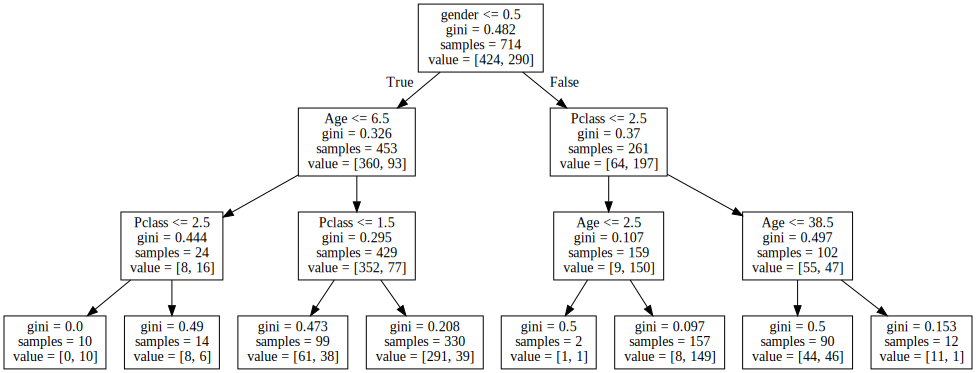

In [121]:
graph

In [122]:
graph.render("TitanicTree")

'TitanicTree.pdf'

# 6 run ensamble method: 
## changing model to Random Forest

In [131]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini", 
                                       random_state=222).fit(titanic_short.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


changing max depth

In [135]:
rf =  ensemble.RandomForestClassifier(max_depth=4, criterion="gini", n_estimators=100,
                                       random_state=222).fit(titanic_short.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


In [136]:
rf =  ensemble.RandomForestClassifier(criterion="gini", max_depth=None, n_estimators=100,
                                       random_state=222).fit(titanic_short.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.90


## changing model to Gradient Boosted Trees

In [137]:
gbt =  ensemble.GradientBoostingClassifier(max_depth=4, 
                                           random_state=222).fit(titanic_short.values, 
                                                                 titanic["Survived"])
print ("score %.2f"%gbt.score(titanic_short.values, titanic["Survived"]))

score 0.89


In [142]:
print("Random Forest feature importance")
for f,fi in zip (titanic_short.columns, rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
Pclass 0.19
gender 0.35
Age 0.46


In [141]:
print("Gradient Boosted Tree feature importance")
for f,fi in zip (titanic_short.columns, gbt.feature_importances_):
  print (f, fi.round(2))

Gradient Boosted Tree feature importance
Pclass 0.23
gender 0.47
Age 0.3


In [166]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_short.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.19 +/- 0.04
gender 0.35 +/- 0.05
Age 0.46 +/- 0.05


## is the feature importance consistent between the 2 methods?

In [167]:
range(rf.feature_importances_.shape[0])

range(0, 3)

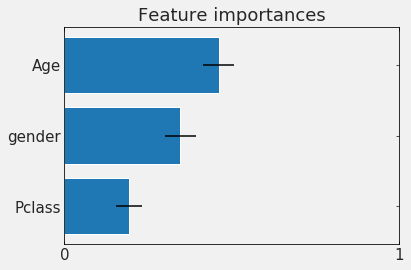

In [178]:
indices = np.argsort(rf.feature_importances_)
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]), 
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]), 
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()
